<a href="https://colab.research.google.com/github/tuxsy/iebs-master-data-science/blob/main/m06/c1/OnevsClasificador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

En este notebook, vamos a presentar una serie de ejemplos simples, que muestren las diferentes maneras que existen en Python de implementar los métodos One vs Rest y One vs One.



# One vs Rest

Establecemos dos tipos de ejemplos:  

*   Uno para ver cómo utilizarlo empleando la clase `LogisticRegression()`.
*   Otro utilizando la forma genérica. 



Definimos el dataset de trabajo mediante la clase `make_classification`, la cual es capaz de generar observaciones aleatorias para un problema en concreto, siguiendo los criterios que le indique el usuario, como por ejemplo: número de muestras, número de clases, etc.

In [1]:
# Generamos un data set para clasificación mútiple
from sklearn.datasets import make_classification
from collections import Counter
# Definimos el dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
n_classes=3, random_state=1)
# resumen del dataset
print(X.shape, y.shape,"\n")
# Resumen del número de elementos en cada clase
print(Counter(y))

(1000, 10) (1000,) 

Counter({1: 334, 2: 334, 0: 332})


In [2]:
X

array([[ 1.89149379, -0.39847585,  1.63856893, ...,  0.58810926,
        -0.02542177, -0.52835426],
       [ 1.86913773, -0.56336215,  2.03411807, ..., -0.55633   ,
        -0.27340013,  0.72129251],
       [ 1.95259701, -2.83144572,  0.19055535, ..., -0.60957741,
        -2.07750191, -1.75469982],
       ...,
       [ 1.98033054,  1.37228804,  1.67376262, ...,  2.75687956,
        -0.20719842,  0.39299534],
       [-1.54305631, -0.27530218,  0.38744703, ...,  0.72769107,
         0.51983329, -1.92306657],
       [ 1.17970389, -3.3812155 , -0.1498426 , ...,  1.24640268,
        -4.00356845, -3.01027048]])

## One vs Rest usando `LogisticRegression()`

Para aplicar el método de One vs Rest empleando la función `LogisticRegression()` es necesario utilizar el hiperparámetro `multi_class='ovr'`. De esta forma, lo que haremos es ajustar tantas regresiones logísticas como clases diferentes tenga el problema, de forma que cada regressión prediga la probabilidad de pertenecer a una clase frente al resto de observaciones.

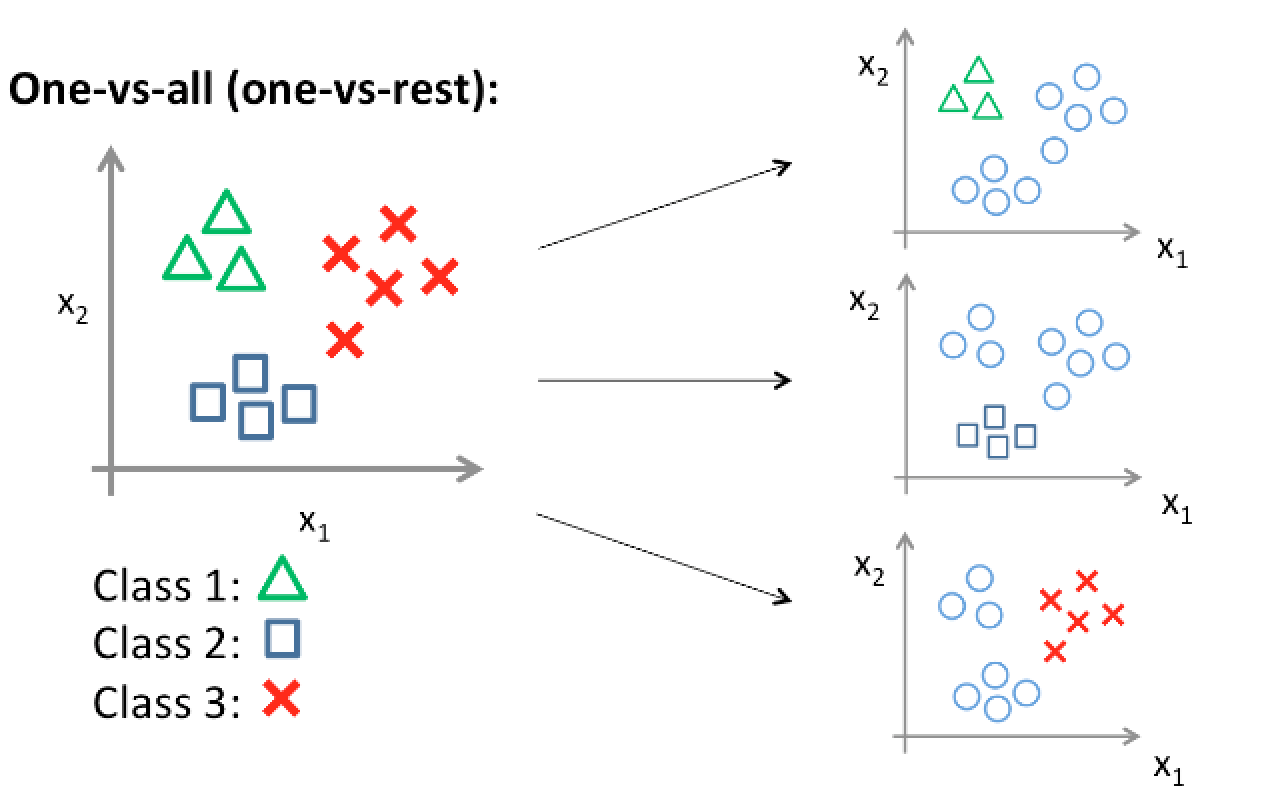

In [3]:
# Hacemos one-vs-rest con el clasificador LogisticRegression
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

# Definimos el moelo para one-vs-rest
model = LogisticRegression(multi_class='ovr')

A la hora de ajustar el modelo vamos a emplear el método de crossvalidation para tratar de obtener un estimador robusto del accuracy de nuestro modelo, de tal forma que nuestro estimador no dependa de una única división de train/test hecha al azar, sino de varias.

En este caso concreto, vamos a repetir 3 veces el proceso de creación de los 10 conjuntos de validación (KFolds), generando grupos diferentes en cada iteración. Esto lo conseguimos con la función *RepeatedStratifiedKFold()*.

In [4]:
# Metodo de crossvalidation para encontrar los parámetros óptimos y evitar overfit
# En este caso vamos a repetir 3 veces la creación de 10 grupos de validación,
# creando diferentes grupos en cada una de las repeticiones
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [5]:
# Ajustamos el modelo empleando el procedimiento de validación cruzada y obtenemos los scores
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print("Obtenemos "+ str(len(n_scores)) + " evaluaciones del accuracy")
print(n_scores)

Obtenemos 30 evaluaciones del accuracy
[0.72 0.62 0.7  0.66 0.68 0.68 0.71 0.69 0.68 0.74 0.71 0.65 0.62 0.7
 0.66 0.67 0.67 0.64 0.77 0.73 0.66 0.69 0.68 0.65 0.62 0.69 0.72 0.71
 0.72 0.73]


Los 30 valores del accuracy que obtenemos, se corresponde con cada una de las evaluaciones que se hace del accuracy mediante el método crossvalidation (10 folds * 3 rep = 30 evaluaciones). Las cuales consideramos una cantidad lo suficientemente importante como para obtener un estimador robusto del accuracy y su posible desviación.

In [6]:
# Resumen bondad ajuste
print('Accuracy promedio: %.3f (+/- %.3f)' % (mean(n_scores), std(n_scores)))

Accuracy promedio: 0.686 (+/- 0.036)


## One vs Rest usando `OneVsRestClassifier()`.

Si no queremos depender de si la implementación particular del algoritmo en cuestión incluye la funcionalidad de One vs Rest o no, podemos emplear la clase [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html), la cual, incluye una implementación general que nos permite aplicar la metodología de One vs Rest utilizando cualquier algoritmo que permita realizar clasificaciones binarias.

Veamos un pequeño ejemplo, como el anterior pero utilizando la clase OneVsRestClassifier.

In [7]:
# Ejemplo  multi-class clasificación utlizando OneVsRestClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# definimos el modelo
model = LogisticRegression()
# definimos la estrategia OvR
ovr = OneVsRestClassifier(model)
# Creamos K grupos para encontrar los parámetros óptimos y evitar overfit
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# utilizamos validación cruzada
n_scores = cross_val_score(ovr, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# Resumen resultados
print('Accuracy promedio: %.3f (+/- %.3f)' % (mean(n_scores), std(n_scores)))

Accuracy promedio: 0.686 (+/- 0.036)


# One vs One

En este caso se van formando clasificadores uno frente a otro, de tal manera que si n es el número de clases a clasificar, entonces el número total de clasificadores a ajustar es:

$$n. clasificadores = \frac{n\cdot(n-1)}{2}$$



## Ones vs One empleando *SVC()*

Para aplicar el método de One vs Rest empleando la función *SVC()*, es necesario especificar el hiperparámetro *decision_function_shape='ovo'*. De esta forma, lo que haremos es ajustar un algoritmo de Máquinas de Soporte Vectorial para clasifcación (SVC) por cada par de clases diferentes, obteniendo así un clasificador que sepa distinguir entre dos clases. Y este ajuste se realiza por cada par de clases posibles.

En el caso de nuestro dataset, al tener 3 clases diferentes, obtendríamos 3 SVC entrenados para distinguir entre:

*   Clase 1 vs Clase 2
*   Clase 1 vs Clase 3
*   Clase 2 vs Clase 3



In [8]:
# Evaluación de  SVM para clasificación multi-clases usando método one-vs-one
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
# Conjunto de datos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
n_classes=3, random_state=1)
# modelo
model = SVC(decision_function_shape='ovo')
# crossvalidación
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluación del modelo
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# resumen fiabilidad
print('Accuracy promedio: %.3f (+/- %.3f)' % (mean(n_scores), std(n_scores)))

Accuracy promedio: 0.871 (+/- 0.028)


## One vs One con OneVsOneClassifier.

De forma genérica y utilizando la clase [OneVsOneClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html), se tendría lo siguiente:

In [9]:
# evaluación SVM para clasificación multi-class  utilizando one-vs-one de OneVsOneClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
# Conjunto de datos
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5,
n_classes=3, random_state=1)
# definición del modelo
model = SVC()
# definimos estrategia one vs one
ovo = OneVsOneClassifier(model)
# crossvalidation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# Evaluamos el modelo
n_scores = cross_val_score(ovo, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# resumen de la fiabilidad
print('Accuracy promedio: %.3f (+/- %.3f)' % (mean(n_scores), std(n_scores)))

Accuracy promedio: 0.872 (+/- 0.030)


# Ejemplo para MNIST.

A continuación vamos a ver un ejemplo muy típico de clasificación múltiple, como es el conjunto de datos MNIST, que lo [podemos descargar desde este enlace](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv).

En este ejemplo se tienen un conjunto de imágenes de números de entrenamiento y los target son códigos indicativos de la imagen en la que se pueden clasificar (el dógito que representan). Los datos descargados son dos ficheros, uno de entrenamiento y otro de test.

In [10]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np

##Opción descargar datos de Google Drive

In [11]:
#Descargamos los ficheros de Google Drive
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1m1_LaPUwS-bCxM0skNrS0ZpMau2eKQwa' -O 'mnist_train.csv'
# !wget --no-check-certificate 'https://drive.google.com/uc?export=download&id=1XR8Lk81-KKbJO4vGz0RBdcACKJHj5Bbu' -O 'mnist_test.csv'

--2023-02-07 16:09:31--  https://drive.google.com/uc?export=download&id=1m1_LaPUwS-bCxM0skNrS0ZpMau2eKQwa
Resolving drive.google.com (drive.google.com)... 74.125.196.101, 74.125.196.139, 74.125.196.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘mnist_train.csv’

mnist_train.csv         [ <=>                ]   2.22K  --.-KB/s    in 0s      

2023-02-07 16:09:31 (22.5 MB/s) - ‘mnist_train.csv’ saved [2278]

--2023-02-07 16:09:31--  https://drive.google.com/uc?export=download&id=1XR8Lk81-KKbJO4vGz0RBdcACKJHj5Bbu
Resolving drive.google.com (drive.google.com)... 74.125.196.101, 74.125.196.139, 74.125.196.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.196.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-b0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/137i20

##Opción de descargar datos con Kaggle

Otra opción sería descargando los datos directamente de la API de Kaggle, pero para ello tendríamos que crearnos una cuenta en Kaggle, generar una clave (*Account > API > Create New API Token*) y subir el archivo *kaggle.json* resultante a nuestra cuenta de Google Drive.

A continuación incluyo un ejemplo de cómo se haría, aunque no lo vamos a emplear para este laboratorio.

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#Mi fichero de la API se encuentra en /Kaggle/kaggle.json
! pip install kaggle
! mkdir ~/.kaggley
! cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download oddrationale/mnist-in-csv
! unzip -o mnist-in-csv.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggley’: File exists
mnist-in-csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


In [20]:
#Buscamos la referencia al dataset que nos interesa
!kaggle datasets list -s mnist

ref                                         title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
zalando-research/fashionmnist               Fashion MNIST                             69MB  2017-12-07 00:54:20         142132       2378  0.85294116       
gpreda/chinese-mnist                        Chinese MNIST                             16MB  2021-03-28 09:44:55           5310        194  0.9411765        
datamunge/sign-language-mnist               Sign Language MNIST                       63MB  2017-10-20 15:09:18          71331       1279  0.7647059        
oddrationale/mnist-in-csv                   MNIST in CSV                              15MB  2018-05-19 02:24:20          93049        619  0.8235294        
daavoo/3d-mnist                             3D MNIST      

##Opción cargar los datos de manera manual

Descargamos los datos de [este enlace](https://www.kaggle.com/datasets/oddrationale/mnist-in-csv) a nuestro ordenador. Extraemos los ficheros correspondientes del archivo .zip descargado. Y subimos los ficheros .csv mediante la opción mostrada en la imagen.

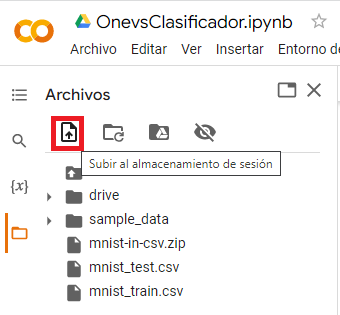

##Estudio de los datos

Ya sea mediante Google Drive, Kaggle o de forma manual, los ficheros con los datos de entrenamiento y de test del dataset MNIST están en la carpeta **/content** de Colab, entonces ahora los leemos simplemente indicando el nombre de los ficheros, puesto que el directorio de trabajo del notebook también es la carpeta **/content**.

In [21]:
import os
os.listdir(os.getcwd()) #Entre los ficheros están los correspondientes al dataset MNIST

['.config',
 'drive',
 'mnist_test.csv',
 'mnist_train.csv',
 'mnist-in-csv.zip',
 'sample_data']

In [22]:
X_train_2 =pd.read_csv("mnist_train.csv")
X_test_2 =pd.read_csv("mnist_test.csv")

In [23]:
# Veamos los datos
X_train_2.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


La columna **label** contiene el valor que representa la figura formada por cada uno de los píxeles, es decir, el valor a predecir y, por lo tanto, será la variable target. 

A continuación vamos a dividir los datos entre variables intependientes (features) y variable dependiente (target).

In [24]:
y_train = X_train_2['label']
X_train = X_train_2.drop('label', axis=1)

y_test = X_test_2['label']
X_test = X_test_2.drop('label', axis=1)

A continuación procedemos a mostrar algunas imágenes y la etiqueta (label) que tienen asociada 

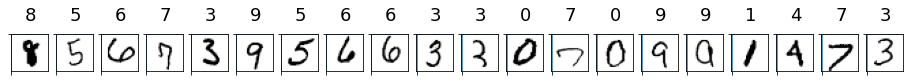

In [25]:
import matplotlib.pyplot as plt
count = 0
sample_size = 20
plt.figure(figsize=(16, 6))
for i in np.random.permutation(X_train.shape[0])[:sample_size]: 
    count = count + 1
    plt.subplot(1, sample_size, count)
    plt.axhline('')
    plt.axvline('')
    plt.text(x=10, y=-10, s=y_train[i], fontsize=18)
    plt.imshow(X_train.values[i].reshape(28,28), cmap=plt.cm.Greys)
plt.show()

Importamos las librerías que vamos a necesitar

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## One-vs-Rest para MNIST dataset

In [27]:
import warnings
warnings.filterwarnings("ignore")

OvR_clf = OneVsRestClassifier(LogisticRegression(max_iter = 115))
OvR_clf.fit(X_train, y_train)

y_pred = OvR_clf.predict(X_test)

print('Accuracy del clasificador OvR: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy del clasificador OvR: 0.92


También se puede utilizar la clase *GridSearchCV()* para encontrar el valor óptimo de un conjunto de hiperparámetros. En este caso, junto con la evaluación del Grid Search se va a realizar una vallidación cruzada, de forma que el valor de cada uno de los hiperparámetros se evalue en diferentes subconjuntos, y garantizar de esta forma, una evaluación de los resultados más robusta.

En este caso concreto queremos encontrar el valor óptimo del parámetro *'C'*, que representa el inverso de la fuerza de regularización. Los valores más pequeños especifican una regularización más fuerte. 

Concretamente para el caso de *GridSearch()* los hiperparámetros hay que introducirlos de esta manera. Para mayor detalle podéis consultar el siguiente post de [stackoverflow](https://stackoverflow.com/questions/12632992/gridsearch-for-an-estimator-inside-a-onevsrestclassifier). 

In [ ]:
#¡¡¡¡ Ojo tarda mucho!!!!
parametros = [{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]}]

OvR_clf = OneVsRestClassifier(LogisticRegression())

grid = GridSearchCV(OvR_clf, parametros, cv=3, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=OneVsRestClassifier(estimator=LogisticRegression()),
             param_grid=[{'estimator__C': [100, 10, 1, 0.1, 0.01, 0.001,
                                           0.0001]}],
             scoring='accuracy')

Una vez terminada la ejecución del Grid Search podemos ver los detalles de todos resultados que se han ido obteniendo para cada valor del hiperparámetro y para cada k fold (o split) de la validación cruzada.

In [ ]:
grid.cv_results_

{'mean_fit_time': array([31.80074406, 32.26359534, 31.87806829, 31.77481023, 31.96666892,
        31.85365025, 31.69608196]),
 'mean_score_time': array([0.49071678, 0.48963149, 0.49310319, 0.48924597, 0.48792322,
        0.48910856, 0.484821  ]),
 'mean_test_score': array([0.90993333, 0.90975   , 0.9099    , 0.90968333, 0.90953333,
        0.91033333, 0.9106    ]),
 'param_estimator__C': masked_array(data=[100, 10, 1, 0.1, 0.01, 0.001, 0.0001],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator__C': 100},
  {'estimator__C': 10},
  {'estimator__C': 1},
  {'estimator__C': 0.1},
  {'estimator__C': 0.01},
  {'estimator__C': 0.001},
  {'estimator__C': 0.0001}],
 'rank_test_score': array([3, 5, 4, 6, 7, 2, 1], dtype=int32),
 'split0_test_score': array([0.90905, 0.90855, 0.90935, 0.90855, 0.90835, 0.9097 , 0.9103 ]),
 'split1_test_score': array([0.9072 , 0.9074 , 0.9073 , 0.9072 , 0.90715, 0.9078 , 

A continuación obtenemos el valor del mejor hiperparámetro, los resultados obtenidos con el mismo y predecimos sobre el conjunto de test.

In [ ]:

print(grid.best_score_)

0.9106


In [ ]:
print(grid.best_params_)

{'estimator__C': 0.0001}


In [ ]:
grid_predictions = grid.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.92


## One vs One para MNIST dataset

In [ ]:
#!!!OJO....Tarda mucho!!!
tuned_parameters = [{'estimator__C': [10, 1, 0.1, 0.01, 0.001, 0.0001]}]


OvO_clf = OneVsOneClassifier(LogisticRegression())

grid = GridSearchCV(OvO_clf, tuned_parameters, cv=3, scoring='accuracy')

grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=OneVsOneClassifier(estimator=LogisticRegression()),
             param_grid=[{'estimator__C': [10, 1, 0.1, 0.01, 0.001, 0.0001]}],
             scoring='accuracy')

Una vez ejecutada la celda anterior, podemos estudiar en detalle los resultados del Grid Search.

In [ ]:
grid.cv_results_

{'mean_fit_time': array([33.17193786, 31.24584238, 31.4288288 , 31.8500758 , 32.17286873,
        32.33346693]),
 'mean_score_time': array([3.67684158, 3.66197983, 4.16557256, 3.6544164 , 3.72289697,
        3.69862191]),
 'mean_test_score': array([0.91886667, 0.91916667, 0.919     , 0.91966667, 0.9218    ,
        0.92808333]),
 'param_estimator__C': masked_array(data=[10, 1, 0.1, 0.01, 0.001, 0.0001],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'estimator__C': 10},
  {'estimator__C': 1},
  {'estimator__C': 0.1},
  {'estimator__C': 0.01},
  {'estimator__C': 0.001},
  {'estimator__C': 0.0001}],
 'rank_test_score': array([6, 4, 5, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.9183 , 0.9193 , 0.91935, 0.91975, 0.9215 , 0.9273 ]),
 'split1_test_score': array([0.91785, 0.91715, 0.9168 , 0.9186 , 0.92   , 0.92725]),
 'split2_test_score': array([0.92045, 0.92105, 0.92085, 0.92065, 0.9239 , 0.9297 ]),

In [ ]:
print(grid.best_score_)

0.9280833333333334


In [ ]:
print(grid.best_params_)

{'estimator__C': 0.0001}


In [ ]:
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, grid_predictions)))

Accuracy: 0.92
